In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_figure_A = pd.read_csv("../data_for_figures/data_figure_A.csv")
data_figure_B = pd.read_csv("../data_for_figures/data_figure_B.csv")
data_figure_C = pd.read_csv("../data_for_figures/data_figure_C.csv")

In [4]:
sns.set_theme(style="ticks", context="talk")
plt.rcParams.update({
    "axes.linewidth": 1.1,
    "xtick.major.size": 4, "ytick.major.size": 4,
})

In [5]:
hue_order = ["Insecure", "Secure"]

In [6]:
palette = {"Insecure": "#F79256", "Secure": "#00B2CA"}

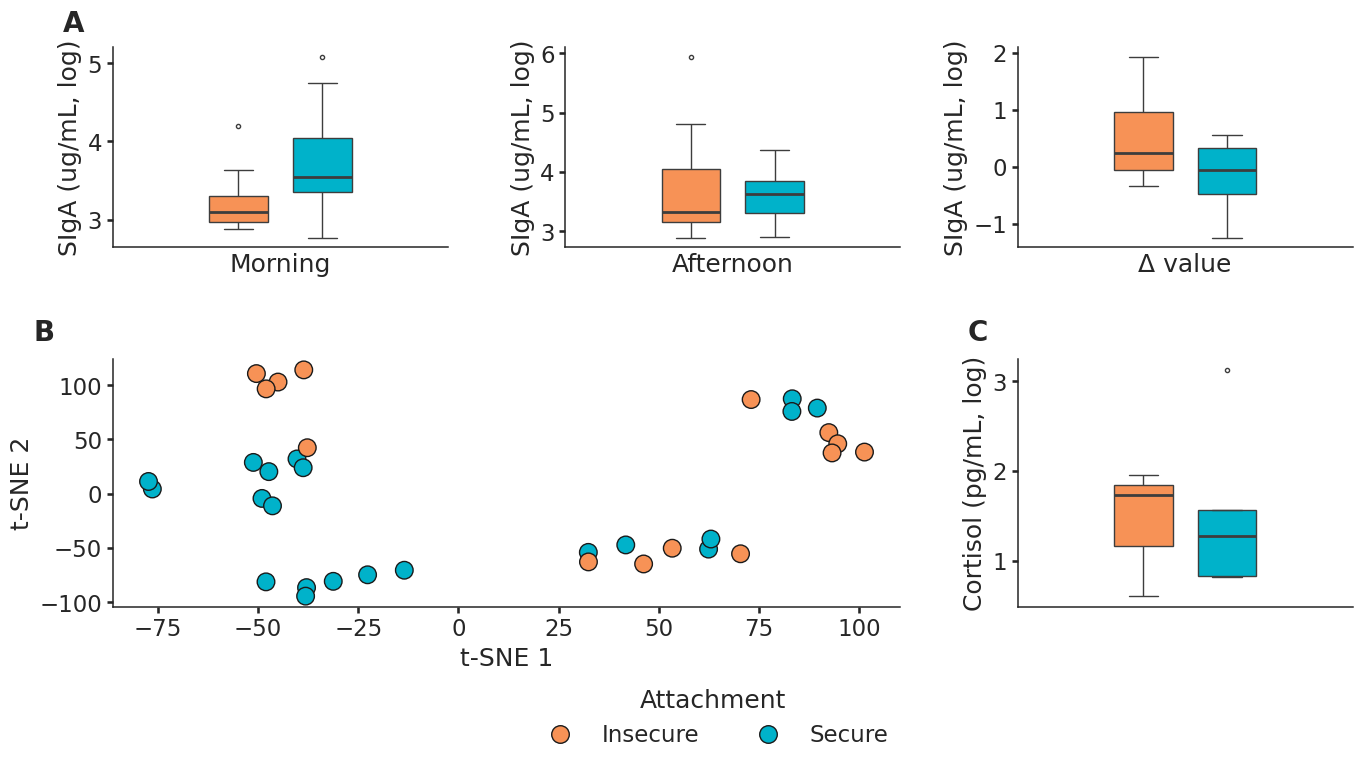

In [7]:
fig = plt.figure(figsize=(16, 8))
gs  = fig.add_gridspec(
    nrows=2, ncols=3,
    height_ratios=[1.0, 1.25],   
    width_ratios=[1, 1, 1],
    hspace=0.5, wspace=0.35
)

ax_morn = fig.add_subplot(gs[0, 0])
ax_aft  = fig.add_subplot(gs[0, 1])
ax_diff = fig.add_subplot(gs[0, 2])
ax_tsne = fig.add_subplot(gs[1, 0:2])
ax_cort = fig.add_subplot(gs[1, 2])

common_box_kws = dict(
    hue="Attachment", hue_order=hue_order, palette=palette, saturation=1, gap=0.3,
    linewidth=1, fliersize=3, width=0.5, medianprops=dict(linewidth=2), dodge=True,
)

sns.boxplot(data=data_figure_A, y="sIgA_Average_Morning_log",   ax=ax_morn, **common_box_kws)
sns.boxplot(data=data_figure_A, y="sIgA_Average_Afternoon_log", ax=ax_aft,  **common_box_kws)
sns.boxplot(data=data_figure_A, y="sIgA_Average_Difference_log",ax=ax_diff, **common_box_kws)

ax_morn.set(xlabel="Morning", ylabel="SIgA (ug/mL, log)")
ax_aft.set (xlabel="Afternoon", ylabel="SIgA (ug/mL, log)")
ax_diff.set(xlabel="Δ value", ylabel="SIgA (ug/mL, log)")

for ax in (ax_morn, ax_aft, ax_diff):
    ax.set_xticks([])
    leg = ax.get_legend()
    if leg: leg.remove()
    ax.grid(False)
    sns.despine(ax=ax)

sp = sns.scatterplot(
    data=data_figure_B, x="p_1", y="p_2",
    hue="Attachment", hue_order=hue_order, palette=palette,
    ax=ax_tsne, s=160, edgecolor="k", linewidth=1
)
ax_tsne.set(xlabel="t-SNE 1", ylabel="t-SNE 2")
handles, labels = ax_tsne.get_legend_handles_labels()
leg = ax_tsne.get_legend()
if leg: leg.remove()
ax_tsne.grid(False)
sns.despine(ax=ax_tsne)

sns.boxplot(
    data=data_figure_C,
    y="Log-transformed Cortisol (pg/mL)",
    ax=ax_cort, **common_box_kws
)
ax_cort.set(xlabel="", ylabel="Cortisol (pg/mL, log)")
leg = ax_cort.get_legend()
if leg: leg.remove()
ax_cort.set_xticks([])
ax_cort.grid(False)
sns.despine(ax=ax_cort)

fig.legend(
    handles, labels, title="Attachment",
    loc="lower center", bbox_to_anchor=(0.5, -0.02),
    ncol=2, frameon=False
)

plt.subplots_adjust(bottom=0.18)

ax_morn.text(-0.15, 1.05, "A", transform=ax_morn.transAxes, fontsize=20, fontweight="bold", va="bottom")
ax_tsne.text(-0.10, 1.05, "B", transform=ax_tsne.transAxes, fontsize=20, fontweight="bold", va="bottom")
ax_cort.text(-0.15, 1.05, "C", transform=ax_cort.transAxes, fontsize=20, fontweight="bold", va="bottom")


plt.tight_layout()
plt.savefig(
    "../figures_for_paper/figure_02.png", 
    dpi=300,
    bbox_inches="tight")